C:\Users\Abhilasha\AppData\Local\Temp\ipykernel_6568\1390921221.py:114: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


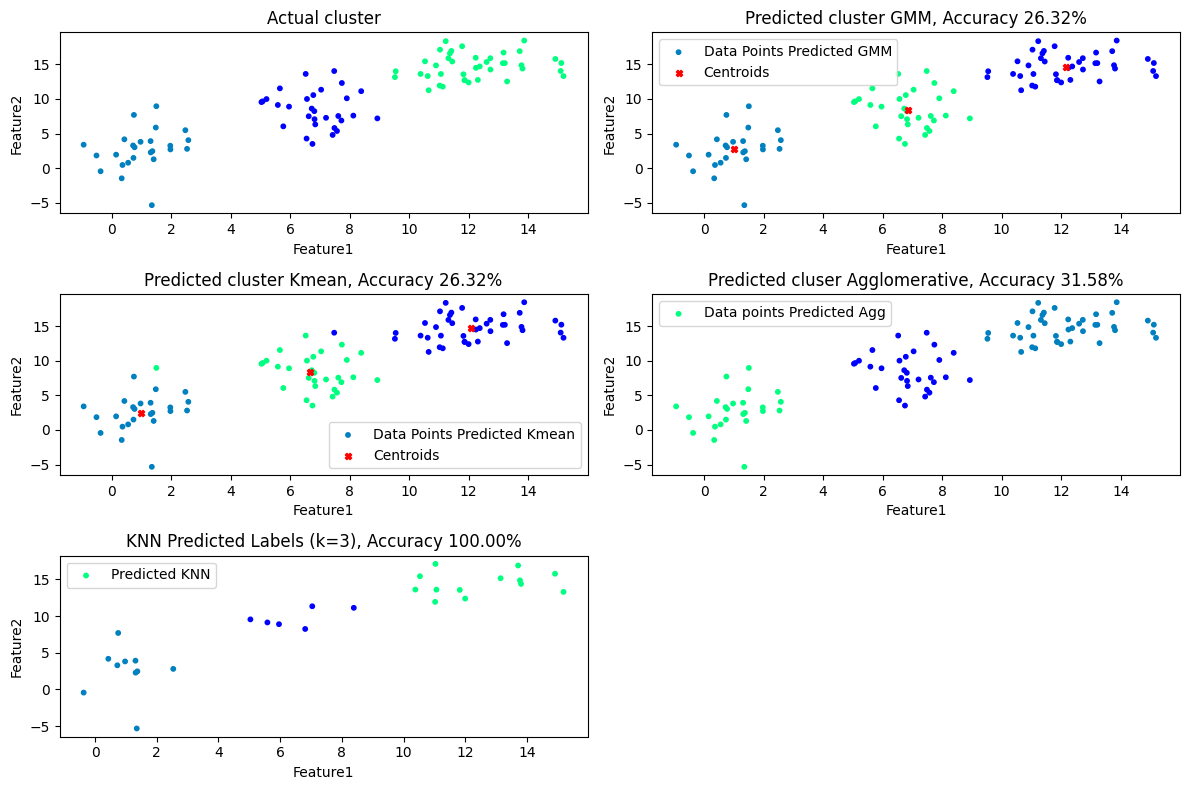

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


mu1, sigma1 = [7, 9], [[1, -0.5], [-0.5, 10]]
mu2, sigma2 = [1, 3], [[1, 0.5], [0.5, 10]]
mu3, sigma3 = [12, 15], [[2, 0.8], [0.8, 4]]

# Generate synthetic data
np.random.seed(42)
cluster1 = np.random.multivariate_normal(mu1, sigma1, size=30)
label1 = np.full((cluster1.shape[0], 1), '0')
cluster1_with_label = np.hstack((cluster1, label1))

cluster2 = np.random.multivariate_normal(mu2, sigma2, size=25)
label2 = np.full((cluster2.shape[0], 1), '1')
cluster2_with_label = np.hstack((cluster2, label2))

cluster3 = np.random.multivariate_normal(mu3, sigma3, size=40)
label3 = np.full((cluster3.shape[0], 1), '2')
cluster3_with_label = np.hstack((cluster3, label3))

combined_data = np.vstack((cluster1_with_label, cluster2_with_label, cluster3_with_label))
np.random.shuffle(combined_data)

df = pd.DataFrame(combined_data, columns=['Feature1', 'Feature2', 'label_true'])
X = df[['Feature1', 'Feature2']].astype(float)
y_true = df['label_true'].values.astype(int)

# Fit GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Predict cluster labels
y_predicted_gmm = gmm.predict(X)
df['Predicted Label GMM'] = y_predicted_gmm


kmeans = KMeans(n_clusters=3, random_state=42)
y_predicted_kmeans = kmeans.fit_predict(X)
df['Predicted Label KMeans'] = y_predicted_kmeans


agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_predicted_agg = agg_cluster.fit_predict(X)
df['Predicted Label Agglomerative'] = y_predicted_agg


X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=42)

# Train the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predicted_KNN = knn.predict(X_test)


accuracy_gmm = accuracy_score(y_true, y_predicted_gmm)
accuracy_kmeans = accuracy_score(y_true, y_predicted_kmeans)
accuracy_agg = accuracy_score(y_true, y_predicted_agg)
accuracy_knn = accuracy_score(y_test, y_predicted_KNN)

# Plot the results
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(12, 8), layout="constrained")

# Scatter plot for True Labels
axs[0,0].scatter(X['Feature1'].values, X['Feature2'].values, c=y_true, cmap='winter', s=10, label="Data Points")
axs[0,0].set_title("Actual cluster")
axs[0,0].set_xlabel("Feature1")
axs[0,0].set_ylabel("Feature2")


# Scatter plot for Predicted Labels
axs[0,1].scatter(X['Feature1'].values, X['Feature2'].values, c=y_predicted_gmm, cmap='winter', s=10, label="Data Points Predicted GMM")

# GMM cluster centers
axs[0,1].scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=20, marker='X', label="Centroids")
axs[0,1].set_title(f"Predicted cluster GMM, Accuracy {accuracy_gmm * 100:.2f}%")
axs[0,1].set_xlabel("Feature1")
axs[0,1].set_ylabel("Feature2")
axs[0,1].legend()

# Scatter plot for Predicted Labels
axs[1,0].scatter(X['Feature1'].values, X['Feature2'].values, c=y_predicted_kmeans, cmap='winter', s=10, label="Data Points Predicted Kmean")

# GMM cluster centers
axs[1,0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=20, marker='X', label="Centroids")
axs[1,0].set_title(f"Predicted cluster Kmean, Accuracy {accuracy_kmeans * 100:.2f}%")
axs[1,0].set_xlabel("Feature1")
axs[1,0].set_ylabel("Feature2")
axs[1,0].legend()

axs[1,1].scatter(X['Feature1'].values, X['Feature2'].values, c=y_predicted_agg, cmap='winter', s=10, label='Data points Predicted Agg')
axs[1,1].set_title(f"Predicted cluser Agglomerative, Accuracy {accuracy_agg * 100:.2f}%")
axs[1,1].set_xlabel("Feature1")
axs[1,1].set_ylabel("Feature2")
axs[1,1].legend()

# Predicted labels
axs[2,0].scatter(X_test['Feature1'].values, X_test['Feature2'].values, c=y_predicted_KNN, cmap='winter', s=10, label='Predicted KNN')
axs[2,0].set_title(f"KNN Predicted Labels (k={3}), Accuracy {accuracy_knn * 100:.2f}%")
axs[2,0].set_xlabel("Feature1")
axs[2,0].set_ylabel("Feature2")
axs[2,0].legend()

axs[2,1].set_axis_off()

fig.tight_layout()
plt.show()
